## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [2]:
import string
import os
import numpy as np 
from IPython.display import clear_output
import matplotlib.pyplot as plt

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [ ]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_basic/homeworks_basic/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = "".join(text).lower()

assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [5]:
# import wget

!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
# url = 'https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt'
filename = 'onegin.txt'
# wget.download(url, filename)

with open(filename, 'r', encoding="utf8") as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text]

--2021-12-23 02:44:54--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt.1’

onegin.txt.1        100%[===================>] 256.37K  --.-KB/s    in 0.02s   

2021-12-23 02:44:54 (12.4 MB/s) - ‘onegin.txt.1’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [6]:
text_list = text
print(text_list[:10])

['\n', 'I\n', '\n', '«Мой дядя самых честных правил,\n', 'Когда не в шутку занемог,\n', 'Он уважать себя заставил\n', 'И лучше выдумать не мог.\n', 'Его пример другим наука;\n', 'Но, боже мой, какая скука\n', 'С больным сидеть и день и ночь,\n']


In [7]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = "".join(text)

Put all the characters, that you've seen in the text, into variable `tokens`.

In [8]:
tokens = sorted(set(text))
print(len(tokens), tokens)

127 ['\n', ' ', '!', '(', ')', ',', '-', '.', '5', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'G', 'H', 'I', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y', '[', ']', '^', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'y', 'z', '«', '»', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Э', 'Ю', 'Я', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', '–', '—', '’', '…', '€']


Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [9]:
# dict <index>:<char>
# Your great code here
idx_to_token = {idx : token for idx, token in enumerate(tokens)}
# dict <char>:<index>
# Your great code here
token_to_idx = {token : idx for idx, token in enumerate(tokens)}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

max length = 159


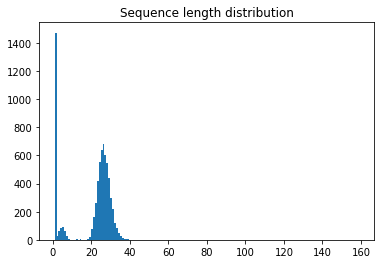

In [10]:
MAX_LEN = max(map(len, text_list))
print("max length =", MAX_LEN)

plt.title('Sequence length distribution')
hist = plt.hist(list(map(len, text_list)),bins=MAX_LEN)

In [11]:
# Let's check how many sentences are longer than 45
sum(len(sentence) > 45 for sentence in text_list)

5

In [12]:
# So it's only 5 sentences longer than 45, so let's remove them

text_list = list(filter(lambda sentence : len(sentence) < 45, text_list))

In [13]:
MAX_LEN = max(map(len, text_list))
print(MAX_LEN)

42


In [14]:
try:
    token_to_idx['@']
except KeyError:
    PAD_CHAR = '@' 
    tokens.append(PAD_CHAR)
    token_to_idx[PAD_CHAR] = len(token_to_idx)
    idx_to_token[127] = PAD_CHAR

In [15]:
for i in range(len(text_list)):
    diff = MAX_LEN - len(text_list[i])
    if diff > 0:
        text_list[i] = text_list[i][:-1] + PAD_CHAR*diff + "\n"

In [16]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text_list)):
    # Remove last character for input sequence
    input_seq.append(text_list[i][:-1])
    
    # Remove firsts character for target sequence
    target_seq.append(text_list[i][1:])
    print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Выходные данные были обрезаны до нескольких последних строк (5000).
Target Sequence: устынный замок навещать,@@@@@@@@@@@@@@@@

Input Sequence: Чтоб книжки здесь одной читать.@@@@@@@@@@
Target Sequence: тоб книжки здесь одной читать.@@@@@@@@@@

Input Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Target Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Input Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Target Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Input Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Target Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Input Sequence: XXI@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Target Sequence: XI@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Input Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Target Sequence: @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

Input Sequence: Татьяна с ключницей простилась@@@@@@@@@@@
Target Sequence: атьяна с ключницей простилась@@@@@@@@@@@

Input Sequence: За воротами. Через день@@@@@@@@@@@@@@@

In [17]:
for i in range(len(text_list)):
    input_seq[i] = [token_to_idx[token] for token in input_seq[i]]
    target_seq[i] = [token_to_idx[token] for token in target_seq[i]]

In [18]:
dict_size = len(token_to_idx)
seq_len = MAX_LEN - 1
batch_size = len(text_list)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [19]:
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)
print("Input shape: {} --> (Batch Size, Sequence Length, One-Hot Encoding Size)".format(input_seq.shape))

Input shape: (7083, 41, 128) --> (Batch Size, Sequence Length, One-Hot Encoding Size)


### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [21]:
import torch

is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [ ]:
# Your code here
import torch, torch.nn as nn
import torch.nn.functional as F

class VanillaRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(VanillaRNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

      
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        hidden = self.init_hidden(batch_size)

        out, hidden = self.rnn(x, hidden)
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        return torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)

In [ ]:
model = VanillaRNN(input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1)
model = model.to(device)

n_epochs = 1000
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [ ]:
# Training Run
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

input_seq = input_seq.to(device)
target_seq = target_seq.to(device)

history = []

for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() 
    
    output, hidden = model(input_seq)
    output = output.to(device)
    
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))
        
    history.append(loss.data.numpy())

Epoch: 100/1000............. Loss: 3.6214
Epoch: 200/1000............. Loss: 2.4551
Epoch: 300/1000............. Loss: 1.9597
Epoch: 400/1000............. Loss: 1.7463
Epoch: 500/1000............. Loss: 1.6657
Epoch: 600/1000............. Loss: 1.6124
Epoch: 700/1000............. Loss: 1.5584
Epoch: 800/1000............. Loss: 1.4958
Epoch: 900/1000............. Loss: 1.4507
Epoch: 1000/1000............. Loss: 1.4208


In [22]:
def plot_loss(losses: list, title: str=None):
    fig = plt.figure(figsize=(6, 4))
    if title is not None:
        plt.title(title)
    plt.plot(losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch #')
    plt.show()

In [ ]:
plot_loss(history,title='VanillaRNN')

In [23]:
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[token_to_idx[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character = character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return idx_to_token[char_ind], hidden

In [24]:
def sample(model, out_len, start='hey'):
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

In [ ]:
# An example of generated text.
sample(model, 200, 'а')

'а во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во во '

### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [28]:
# Your beautiful code here  
import torch, torch.nn as nn
import torch.nn.functional as F

class LSTMRNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(LSTMRNN, self).__init__()

        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        hidden = self.init_hidden(batch_size)

        out, hidden = self.lstm(x, hidden)
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        return (torch.zeros(self.n_layers, batch_size, self.hidden_dim, requires_grad=True),
                torch.zeros(self.n_layers, batch_size, self.hidden_dim, requires_grad=True))

In [29]:
model = LSTMRNN(input_size=dict_size, output_size=dict_size, hidden_dim=64, n_layers=1)
model = model.to(device)

n_epochs = 1000
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [31]:
# Training Run
input_seq = torch.from_numpy(input_seq)
target_seq = torch.Tensor(target_seq)

input_seq = input_seq.to(device)
target_seq = target_seq.to(device)

history = []

for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() 
    
    output, hidden = model(input_seq)
    output = output.to(device)
    
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))
        
    history.append(loss.data.numpy())

Epoch: 100/1000............. Loss: 2.0145
Epoch: 200/1000............. Loss: 1.6954
Epoch: 300/1000............. Loss: 1.6235
Epoch: 400/1000............. Loss: 1.5658
Epoch: 500/1000............. Loss: 1.4912
Epoch: 600/1000............. Loss: 1.4225
Epoch: 700/1000............. Loss: 1.3743
Epoch: 800/1000............. Loss: 1.3373
Epoch: 900/1000............. Loss: 1.3075
Epoch: 1000/1000............. Loss: 1.2758


Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

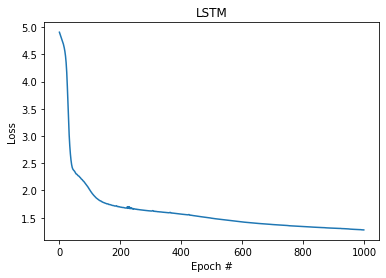

In [32]:
plot_loss(history, title='LSTM')

In [39]:
# An example of generated text.
sample(model, 200, 'дом')

'дом столе столе стола стот@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@'

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [ ]:
# Saving and loading code here
torch.save(model.state_dict(), 'lstm.pth')

In [ ]:
new_lstm_model = LSTMRNN()
new_lstm_model.load_state_dict(torch.load('lstm.pth'))
new_lstm_model.eval()

In [ ]:
print(sample(new_lstm_model, 200, ' '))

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)